# Persiapan

## Mount Data dan Import Library

In [1]:
!pip install -r "../requirements.txt"

     |████████████████████████████████| 283 kB 16.1 MB/s 
     |████████████████████████████████| 366 kB 49.5 MB/s 


In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud 

## Daftar Data

In [3]:
datas = [f'../Data/{i}' for i in os.listdir('../Data')]

In [4]:
datas

['../Data/Sales_June_2019.csv',
 '../Data/Sales_November_2019.csv',
 '../Data/Sales_August_2019.csv',
 '../Data/Sales_February_2019.csv',
 '../Data/Sales_March_2019.csv',
 '../Data/Sales_April_2019.csv',
 '../Data/Sales_July_2019.csv',
 '../Data/Sales_December_2019.csv',
 '../Data/Sales_May_2019.csv',
 '../Data/Sales_January_2019.csv',
 '../Data/Sales_October_2019.csv',
 '../Data/Sales_September_2019.csv']

## Data Overview

In [5]:
#df_jan = pd.read_csv('../Data/Sales_January_2019.csv')

In [6]:
#columns = df_jan.columns

In [7]:
#columns

## Menggabungkan Semua Data

In [8]:
li = []
for data in datas:
    df_data = pd.read_csv(data, index_col=None, header=0)
    li.append(df_data)
df = pd.concat(li, axis=0, ignore_index=True)


In [9]:
# Disini kita punya 186850 rows 6 columns
df.shape

(186850, 6)

In [10]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,209921,USB-C Charging Cable,1,11.95,06/23/19 19:34,"950 Walnut St, Portland, ME 04101"
1,209922,Macbook Pro Laptop,1,1700.0,06/30/19 10:05,"80 4th St, San Francisco, CA 94016"
2,209923,ThinkPad Laptop,1,999.99,06/24/19 20:18,"402 Jackson St, Los Angeles, CA 90001"
3,209924,27in FHD Monitor,1,149.99,06/05/19 10:21,"560 10th St, Seattle, WA 98101"
4,209925,Bose SoundSport Headphones,1,99.99,06/25/19 18:58,"545 2nd St, San Francisco, CA 94016"


## Drop data yang berisi nama kolom

In [11]:
df['Quantity Ordered'].unique()

array(['1', '3', '2', 'Quantity Ordered', '5', nan, '4', '9', '6', '7',
       '8'], dtype=object)

In [12]:
df[df['Quantity Ordered'] == 'Quantity Ordered']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
158,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
990,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1679,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1684,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
3126,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
185164,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185551,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [13]:
# Menghapus semua baris yang datanya berisikan nama kolom
df = df[df['Quantity Ordered'] != 'Quantity Ordered']

In [14]:
# Sudah tidak ada lagi nama kolom
df['Quantity Ordered'].unique()

array(['1', '3', '2', '5', nan, '4', '9', '6', '7', '8'], dtype=object)

## Mencari NAN Values

In [15]:
df.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [16]:
# Iki ketemu nan kabeh kolom e
df[df.isnull().any(axis=1)]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
339,NaN,NaN,NaN,NaN,NaN,NaN
630,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1136,NaN,NaN,NaN,NaN,NaN,NaN
1349,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
185176,NaN,NaN,NaN,NaN,NaN,NaN
185438,NaN,NaN,NaN,NaN,NaN,NaN
186042,NaN,NaN,NaN,NaN,NaN,NaN
186548,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
df = df.dropna(how='all')

In [18]:
# Reset index setelah dropna supaya urutan baris tetap urut
df.reset_index(drop=True, inplace=True)

In [19]:
df.shape

(185950, 6)

In [20]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,209921,USB-C Charging Cable,1,11.95,06/23/19 19:34,"950 Walnut St, Portland, ME 04101"
1,209922,Macbook Pro Laptop,1,1700.0,06/30/19 10:05,"80 4th St, San Francisco, CA 94016"
2,209923,ThinkPad Laptop,1,999.99,06/24/19 20:18,"402 Jackson St, Los Angeles, CA 90001"
3,209924,27in FHD Monitor,1,149.99,06/05/19 10:21,"560 10th St, Seattle, WA 98101"
4,209925,Bose SoundSport Headphones,1,99.99,06/25/19 18:58,"545 2nd St, San Francisco, CA 94016"


In [21]:
# nan values sudah kosong
df.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

## Konversi Datatype

In [22]:
# Pengecekan tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185950 non-null  object
 1   Product           185950 non-null  object
 2   Quantity Ordered  185950 non-null  object
 3   Price Each        185950 non-null  object
 4   Order Date        185950 non-null  object
 5   Purchase Address  185950 non-null  object
dtypes: object(6)
memory usage: 8.5+ MB


#### Datetime menjadi datetime object

In [23]:
df['Order Date'] = pd.to_datetime(df["Order Date"])

#### Konversi order id, quanity, price (float)

In [24]:
column_to_int = ['Order ID','Quantity Ordered']

In [25]:
for col in column_to_int:
    df[col] = df[col].astype(np.int)

In [26]:
df['Price Each'] = df['Price Each'].astype(np.float)

#### Konversi nama product dan alamat menjadi string

In [27]:
for col in ['Product','Purchase Address']:
    df[col] = df[col].astype(np.str)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  int64         
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int64         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 8.5+ MB


## Pengolahan Data
* Membuat kolom day, month, year dari kolom order date
* Membuat kolom month_year (contoh: january-2020) dari kolom order date
* Membuat kolom Price total dengan mengalikan kolom price each dengan qty

In [29]:
# Membuat kolom day, month, year dari kolom order date
df["Day Order"] = pd.DatetimeIndex(df["Order Date"]).day
df["Month Order"]= pd.DatetimeIndex(df["Order Date"]).month
df["Year Order"] = pd.DatetimeIndex(df["Order Date"]).year


In [30]:
# Membuat kolom month_year (contoh: january-2020) dari kolom order date

# df["Month_Year"] = df["Month Order"].astype(str) + "-" + df["Year Order"].astype(str)

df["Month_Year"] = df["Order Date"].apply(lambda x : x.strftime('%Y-%m'))

In [31]:
# Membuat kolom Price total dengan mengalikan kolom price each dengan qty
df["Price Total"] = df["Quantity Ordered"] * df["Price Each"]
df = df.sort_values(by=["Order Date"])

In [32]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Day Order,Month Order,Year Order,Month_Year,Price Total
150673,147268,Wired Headphones,1,11.99,2019-01-01 03:07:00,"9 Lake St, New York City, NY 10001",1,1,2019,2019-01,11.99
151480,148041,USB-C Charging Cable,1,11.95,2019-01-01 03:40:00,"760 Church St, San Francisco, CA 94016",1,1,2019,2019-01,11.95
152827,149343,Apple Airpods Headphones,1,150.00,2019-01-01 04:56:00,"735 5th St, New York City, NY 10001",1,1,2019,2019-01,150.00
153478,149964,AAA Batteries (4-pack),1,2.99,2019-01-01 05:53:00,"75 Jackson St, Dallas, TX 75001",1,1,2019,2019-01,2.99
152834,149350,USB-C Charging Cable,2,11.95,2019-01-01 06:03:00,"943 2nd St, Atlanta, GA 30301",1,1,2019,2019-01,23.90


## Mengubah Data Menjadi Numerik

In [33]:
from sklearn.preprocessing import LabelEncoder

In [34]:
encoder = LabelEncoder()
df['Product_Encoded'] = encoder.fit_transform(df['Product'])

In [35]:
df['Month_Year_Encoded'] = encoder.fit_transform(df['Month_Year'])

In [36]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Day Order,Month Order,Year Order,Month_Year,Price Total,Product_Encoded,Month_Year_Encoded
150673,147268,Wired Headphones,1,11.99,2019-01-01 03:07:00,"9 Lake St, New York City, NY 10001",1,1,2019,2019-01,11.99,17,0
151480,148041,USB-C Charging Cable,1,11.95,2019-01-01 03:40:00,"760 Church St, San Francisco, CA 94016",1,1,2019,2019-01,11.95,15,0
152827,149343,Apple Airpods Headphones,1,150.00,2019-01-01 04:56:00,"735 5th St, New York City, NY 10001",1,1,2019,2019-01,150.00,6,0
153478,149964,AAA Batteries (4-pack),1,2.99,2019-01-01 05:53:00,"75 Jackson St, Dallas, TX 75001",1,1,2019,2019-01,2.99,5,0
152834,149350,USB-C Charging Cable,2,11.95,2019-01-01 06:03:00,"943 2nd St, Atlanta, GA 30301",1,1,2019,2019-01,23.90,15,0


## Visualisasi Data

In [37]:
df.describe()

,Order ID,Quantity Ordered,Price Each,Day Order,Month Order,Year Order,Price Total,Product_Encoded,Month_Year_Encoded
count,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000
mean,230417.569379,1.124383,184.399735,15.759532,7.059140,2019.000183,185.490917,9.134794,6.061334
std,51512.737110,0.442793,332.731330,8.782176,3.502996,0.013521,332.919771,5.383887,3.502958
min,141234.000000,1.000000,2.990000,1.000000,1.000000,2019.000000,2.990000,0.000000,0.000000
25%,185831.250000,1.000000,11.950000,8.000000,4.000000,2019.000000,11.950000,5.000000,3.000000
50%,230367.500000,1.000000,14.950000,16.000000,7.000000,2019.000000,14.950000,7.000000,6.000000
75%,275035.750000,1.000000,150.000000,23.000000,10.000000,2019.000000,150.000000,15.000000,9.000000
max,319670.000000,9.000000,1700.000000,31.000000,12.000000,2020.000000,3400.000000,18.000000,12.000000


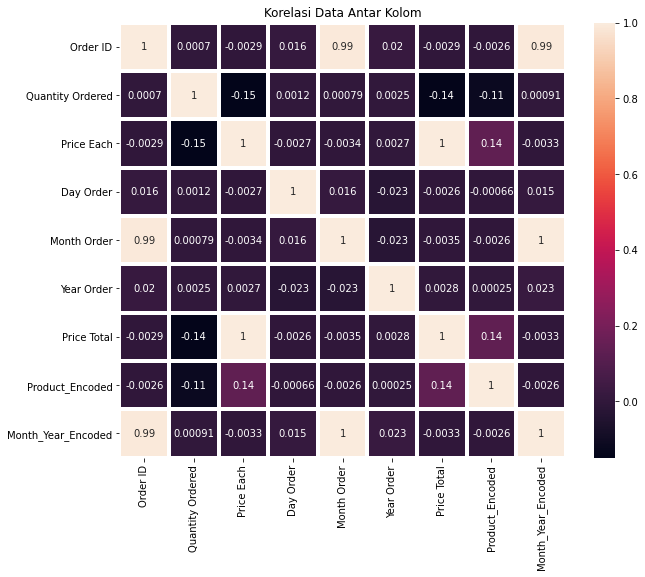

In [38]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,linewidths=3)
plt.title('Korelasi Data Antar Kolom')
plt.savefig('../Output/Korelasi Data')
plt.show()

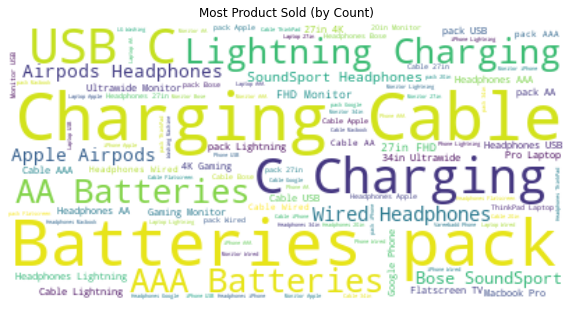

In [39]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(' '.join(df['Product']))
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('Most Product Sold (by Count)')
plt.savefig('../Output/Product Count')
plt.show()

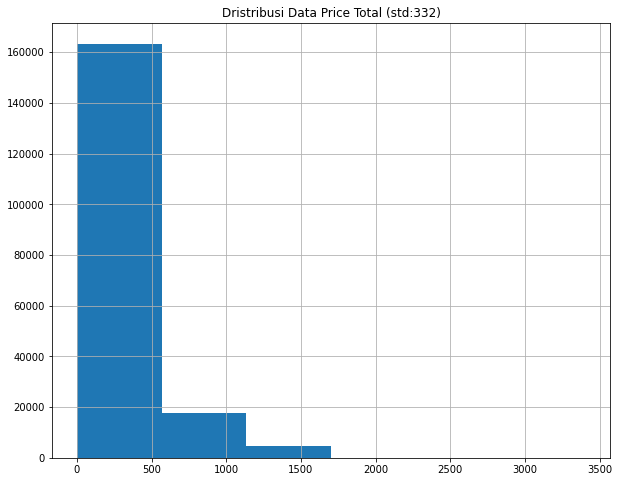

In [40]:
plt.figure(figsize=(10,8))
plt.hist(df['Price Total'],bins=6)
plt.title(f"Dristribusi Data Price Total (std:{df['Price Total'].std().astype(np.int)})")
plt.grid()
plt.savefig('../Output/Histogram Price Total')
plt.show()

## Exploratory Data Analysis (EDA)
* Produk Apa Yang Paling Banyak Menghasilkan Pendapatan ?
* Penghasilan kita setiap bulan
* Penjualan Kita Paling Laku Dimana ?
* Apa top produk yang terjual berdasarkan jumlahnya ?

In [41]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Day Order,Month Order,Year Order,Month_Year,Price Total,Product_Encoded,Month_Year_Encoded
150673,147268,Wired Headphones,1,11.99,2019-01-01 03:07:00,"9 Lake St, New York City, NY 10001",1,1,2019,2019-01,11.99,17,0
151480,148041,USB-C Charging Cable,1,11.95,2019-01-01 03:40:00,"760 Church St, San Francisco, CA 94016",1,1,2019,2019-01,11.95,15,0
152827,149343,Apple Airpods Headphones,1,150.00,2019-01-01 04:56:00,"735 5th St, New York City, NY 10001",1,1,2019,2019-01,150.00,6,0
153478,149964,AAA Batteries (4-pack),1,2.99,2019-01-01 05:53:00,"75 Jackson St, Dallas, TX 75001",1,1,2019,2019-01,2.99,5,0
152834,149350,USB-C Charging Cable,2,11.95,2019-01-01 06:03:00,"943 2nd St, Atlanta, GA 30301",1,1,2019,2019-01,23.90,15,0


#### Q1: Produk Apa Yang Paling Banyak Menghasilkan Pendapatan ?

In [42]:
df_sales = df.groupby('Product').sum()[['Quantity Ordered','Price Total']]

In [43]:
# Produk yang paling profit adalah Macbook Pro Laptop
df_sales.sort_values(by=['Price Total'],ascending=False).head()

,Quantity Ordered,Price Total
Product,,
Macbook Pro Laptop,4728,8037600.00
iPhone,6849,4794300.00
ThinkPad Laptop,4130,4129958.70
Google Phone,5532,3319200.00
27in 4K Gaming Monitor,6244,2435097.56


#### Q2: Penghasilan setiap bulan

In [44]:
df_month_year = df.groupby('Month_Year').sum()[['Quantity Ordered','Price Total']]

In [45]:
# Meremove bulan 1 2020 karena mungkin penjualan belum jalan 1 bulan penuh
df_month_year = df_month_year.iloc[:-1]

In [46]:
df_month_year

,Quantity Ordered,Price Total
Month_Year,,
2019-01,10862,1.813586e+06
2019-02,13449,2.202022e+06
2019-03,17005,2.807100e+06
2019-04,20558,3.390670e+06
2019-05,18667,3.152607e+06
2019-06,15253,2.577802e+06
2019-07,16072,2.647776e+06
2019-08,13448,2.244468e+06
2019-09,13109,2.097560e+06


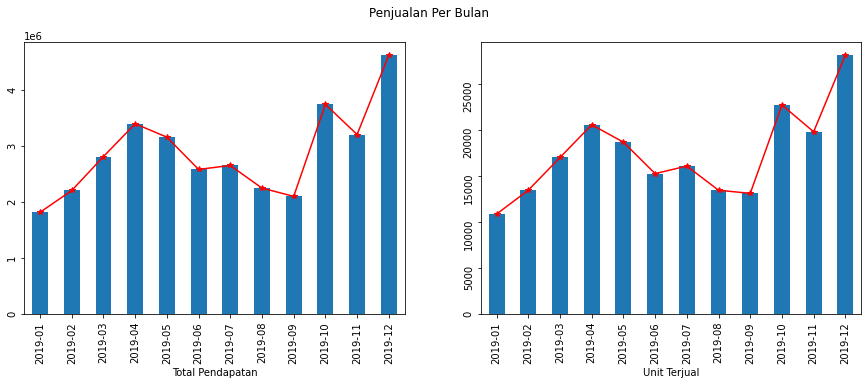

In [47]:
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(15,5))
df_month_year['Price Total'].plot.bar(ax=axes[0])
df_month_year['Price Total'].plot(ax=axes[0],color='red',marker='*')
df_month_year['Quantity Ordered'].plot.bar(ax=axes[1])
df_month_year['Quantity Ordered'].plot(ax=axes[1],color='red',marker='*')
axes[0].tick_params(labelrotation=90)
axes[0].set_xlabel('Total Pendapatan')
axes[1].tick_params(labelrotation=90)
axes[1].set_xlabel('Unit Terjual')
plt.suptitle('Penjualan Per Bulan')
plt.savefig('../Output/Grafik Penjualan Per Bulan')
plt.show()

/opt/venv/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


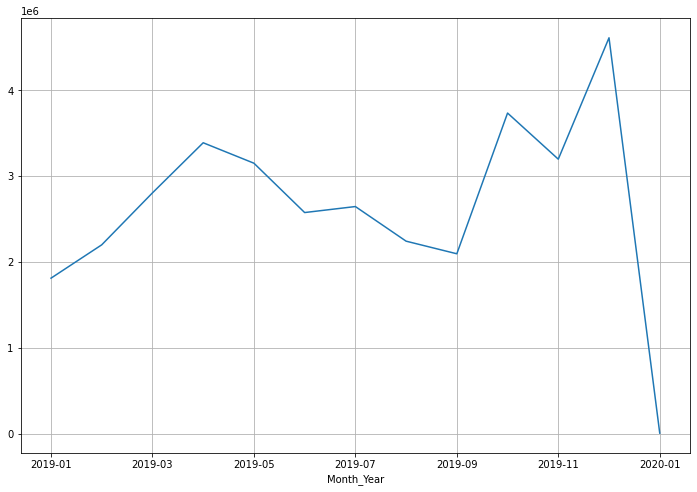

In [48]:
df.head()
line = df.groupby(["Month_Year"])["Price Total"].sum().round(2)
line.plot(kind="line", x="Month_Year", y="Price Total",figsize=(12,8))
plt.grid()


#### Q3: Penjualan Kita Paling Laku Dimana ?

In [49]:
df['Purchase Address City'] = df['Purchase Address'].apply(lambda x : x.split(',')[1][1:])

In [50]:
def cityProduct(city):
    return ' ,'.join(df['Product'][df['Purchase Address City'] == city].value_counts()[:3].index)

In [51]:
df_city = df.groupby('Purchase Address City').sum()[['Quantity Ordered','Price Total']].sort_values(by='Price Total',ascending=False)

In [52]:
df_city['Top 3 Product'] = list(map(cityProduct,df_city.index))

In [53]:
df_city

,Quantity Ordered,Price Total,Top 3 Product
Purchase Address City,,,
San Francisco,50239,8.262204e+06,"USB-C Charging Cable ,Lightning Charging Cable..."
Los Angeles,33289,5.452571e+06,"Lightning Charging Cable ,USB-C Charging Cable..."
New York City,27932,4.664317e+06,"USB-C Charging Cable ,Lightning Charging Cable..."
Boston,22528,3.661642e+06,"USB-C Charging Cable ,Lightning Charging Cable..."
Atlanta,16602,2.795499e+06,"USB-C Charging Cable ,Lightning Charging Cable..."
Dallas,16730,2.767975e+06,"Lightning Charging Cable ,AA Batteries (4-pack..."
Seattle,16553,2.747755e+06,"USB-C Charging Cable ,Lightning Charging Cable..."
Portland,14053,2.320491e+06,"USB-C Charging Cable ,AA Batteries (4-pack) ,L..."
Austin,11153,1.819582e+06,"Lightning Charging Cable ,USB-C Charging Cable..."


#### Q4: Top produk yang terjual berdasarkan jumlahnya

In [54]:
df.groupby('Product').sum()['Quantity Ordered'].sort_values(ascending=False).head()

Product
AAA Batteries (4-pack)      31017
AA Batteries (4-pack)       27635
USB-C Charging Cable        23975
Lightning Charging Cable    23217
Wired Headphones            20557
Name: Quantity Ordered, dtype: int64

## Final Preprocessing

In [55]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Day Order,Month Order,Year Order,Month_Year,Price Total,Product_Encoded,Month_Year_Encoded,Purchase Address City
150673,147268,Wired Headphones,1,11.99,2019-01-01 03:07:00,"9 Lake St, New York City, NY 10001",1,1,2019,2019-01,11.99,17,0,New York City
151480,148041,USB-C Charging Cable,1,11.95,2019-01-01 03:40:00,"760 Church St, San Francisco, CA 94016",1,1,2019,2019-01,11.95,15,0,San Francisco
152827,149343,Apple Airpods Headphones,1,150.00,2019-01-01 04:56:00,"735 5th St, New York City, NY 10001",1,1,2019,2019-01,150.00,6,0,New York City
153478,149964,AAA Batteries (4-pack),1,2.99,2019-01-01 05:53:00,"75 Jackson St, Dallas, TX 75001",1,1,2019,2019-01,2.99,5,0,Dallas
152834,149350,USB-C Charging Cable,2,11.95,2019-01-01 06:03:00,"943 2nd St, Atlanta, GA 30301",1,1,2019,2019-01,23.90,15,0,Atlanta


In [132]:
df_string_date = df.copy()
df_string_date['Order Date'] = df['Order Date'].dt.date.astype(np.str)

In [133]:
df_string_date = df_string_date.groupby('Order Date').sum().iloc[:-1]

In [134]:
df_string_date.tail()

,Order ID,Quantity Ordered,Price Each,Day Order,Month Order,Year Order,Price Total,Product_Encoded,Month_Year_Encoded
Order Date,,,,,,,,,
2019-12-27,237527478,869,125957.79,20844,9264,1558668,126628.05,7190,8492
2019-12-28,251885598,931,133230.34,22932,9828,1653561,134015.50,7243,9009
2019-12-29,258739552,954,154159.42,24389,10092,1697979,156024.62,7761,9251
2019-12-30,249435551,928,151493.15,24300,9720,1635390,152319.81,7272,8910
2019-12-31,235216223,886,130329.86,23715,9180,1544535,131454.30,7050,8415


/opt/venv/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


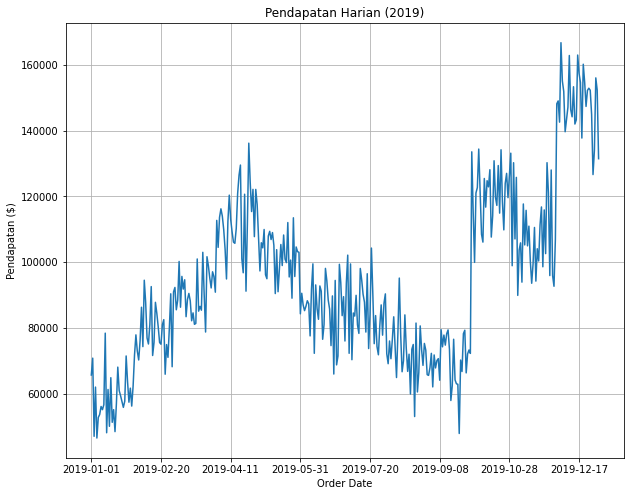

In [139]:
plt.figure(figsize=(10,8))
df_string_date['Price Total'].plot()
plt.title('Pendapatan Harian (2019)')
plt.ylabel('Pendapatan ($)')
plt.grid()
plt.show()

In [142]:
df_string_date["Day Order"] = pd.DatetimeIndex(df_string_date.index).day
df_string_date["Month Order"]= pd.DatetimeIndex(df_string_date.index).month
df_string_date["Year Order"] = pd.DatetimeIndex(df_string_date.index).year

In [144]:
df_ml = df_string_date.copy()
df_ml = df_ml[['Day Order','Month Order','Year Order','Price Total']]

## Modelling

In [147]:
from sklearn.model_selection import train_test_split

# Pemisahan data
train = df_ml.drop('Price Total',axis=1)
target = df_ml['Price Total']

In [149]:
x_train,x_test,y_train,y_test = train_test_split(train,target)

In [151]:
# ML Algorithms
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [152]:
def evaluate(y_pred,y_true):
    print(f'MAE : {mean_absolute_error(y_true,y_pred)}')
    print(f'MAE : {mean_squared_error(y_true,y_pred)}')

In [158]:
# Linear Regresion
lr = LinearRegression()
lr.fit(x_train,y_train)
evaluate(lr.predict(x_test),y_test)

MAE : 18006.20340962544
MAE : 453604419.9468657


In [160]:
# Ridge
rid = Ridge(alpha=.5)
rid.fit(x_train,y_train)
evaluate(rid.predict(x_test),y_test)


MAE : 18006.206006813016
MAE : 453605927.83931303


## Prediksi / Proyeksi

In [168]:
df_ml

,Day Order,Month Order,Year Order,Price Total
Order Date,,,,
2019-01-01,1,1,2019,65681.94
2019-01-02,2,1,2019,70813.20
2019-01-03,3,1,2019,47046.20
2019-01-04,4,1,2019,62012.21
2019-01-05,5,1,2019,46524.63
...,...,...,...,...
2019-12-27,27,12,2019,126628.05
2019-12-28,28,12,2019,134015.50
2019-12-29,29,12,2019,156024.62


In [207]:
df_predict = pd.DataFrame({'Day Order':[i for i in range(1,32)],'Month Order':[1 for i in range(31)],'Year Order':[2020 for i in range(31)]})

In [210]:
df_result = pd.Series(lr.predict(df_predict),pd.date_range(start ='1-1-2020',end ='31-01-2020', freq ='1D'))

/opt/venv/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


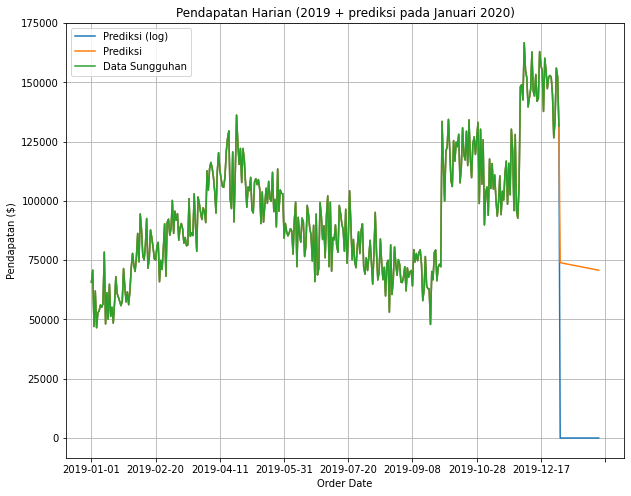

In [226]:
plt.figure(figsize=(10,8))
df_string_date['Price Total'].append(np.log(df_result)).plot(label='Prediksi (log)')
df_string_date['Price Total'].append(df_result).plot(label='Prediksi')
df_string_date['Price Total'].plot(label='Data Sungguhan')
plt.title('Pendapatan Harian (2019 + prediksi pada Januari 2020)')
plt.ylabel('Pendapatan ($)')
plt.grid()
plt.legend()
plt.savefig('../Output/Prediksi Pendapatan')
plt.show()